# Build environment 环境配置

In [1]:
# 查看当前使用GPU的CUDA版本
!nvidia-smi

Mon Jun 10 13:03:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Git Clone 克隆代码

In [2]:
%cd /content/
!git clone https://github.com/Kedreamix/Linly-Talker
%cd /content/Linly-Talker/

/content
Cloning into 'Linly-Talker'...
remote: Enumerating objects: 1431, done.
remote: Counting objects: 100% (376/376), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 1431 (delta 191), reused 309 (delta 147), pack-reused 1055
Receiving objects: 100% (1431/1431), 91.21 MiB | 32.80 MiB/s, done.
Resolving deltas: 100% (610/610), done.
/content/Linly-Talker


In [3]:
!pip show torch

Name: torch
Version: 2.3.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchtext, torchvision


In [5]:
# 安装torch
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118

# 默认存在ffmpeg
# conda install -q ffmpeg # ffmpeg==4.2.2

# 安装依赖
!pip install -r requirements_app.txt

# QWen安装
!pip install transformers==4.32.0 accelerate tiktoken einops scipy transformers_stream_generator==0.0.4 peft deepspeed

!pip install --upgrade protobuf

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 343.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=90005 sha256=8d454a9dc3362ec66195014b04608b61c60c8c9e18e0179b460ba7946aef0b5b
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Successfully built lit
  Attempting uninstall: triton
    Found existing installation: triton 2.3.0
    Uninstalling triton-2.3.0:
      Successfully uninstalled triton-2.3.0
  Attempting uninstall: torch
    Found existing installation: torch 2.3

  Using cached protobuf-5.27.1-cp38-abi3-manylinux2014_x86_64.whl (309 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numba>=0.57, but you have numba 0.56.4 which is incompatible.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.1 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-cloud-aiplatf

In [6]:
# 测试pytorch的cuda是否可用
import torch
torch.cuda.is_available()

print(torch.__version__)
print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.is_available())

2.0.1+cu118
Tesla T4
1
0
True


In [16]:
# 若想使用语音克隆请，安装语音克隆对应的依赖

# !pip install -r VITS/requirements_gptsovits.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.7/693.7 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 69.5 MB/s eta 0:00:00
  Preparing metadata

In [6]:
# 若希望使用NeRF-based等模型等话，可能需要安装一下对应的环境

# pip install "git+https://github.com/facebookresearch/pytorch3d.git"
# pip install -r TFG/requirements_nerf.txt

# 若pyaudio出现问题，可安装对应依赖
# sudo apt-get install libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0

# 注意以下几个模块，若安装不成功，可以进入路径利用pip install . 或者 python setup.py install编译安装
# NeRF/freqencoder
# NeRF/gridencoder
# NeRF/raymarching
# NeRF/shencoder

In [19]:
# 若使用PaddleTTS，可安装对应的环境
# !pip install -r TTS/requirements_paddle.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.6/401.6 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# 若使用FunASR，可安装对应的环境
# !pip install -r ASR/requirements_funasr.txt

  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninstalled requests-2.28.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-cloud-aiplatform 1.52.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-cloud-bigquery-connection 1.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.

In [7]:
# 若使用MuesTalk模型，可安装环境

!pip install --no-cache-dir -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.1"
!mim install "mmdet>=3.1.0"
!mim install "mmpose>=1.1.0"
!pip install -r TFG/requirements_musetalk.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 849.6 kB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
datasets 2.19.2 requires requests>=2.32.1, but you have requests 2.28.2 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-cloud-aiplatform 1.52.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google

安装可以后重启一下，才能使用新安装的库

# Download pretrained models 下载预训练模型

In [10]:
%cd /content/Linly-Talker/

# 在colab推荐使用huggingface下载，方式2
!sh scripts/download_models.sh

/content/Linly-Talker
Please select a model download method:
请选择模型下载方式：
1. Download from ModelScope (No resuming capability)
1. 从 ModelScope 下载（无断点续传功能）
2. Download from Huggingface (With resuming capability)
2. 从 Huggingface 下载（有断点续传功能）
3. Download from Huggingface mirror site (Possibly faster)
3. 从 Huggingface 镜像站点下载（镜像可能快一点）
Enter 1, 2, or 3 to choose a download method: 2
正在从 Huggingface 下载模型...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1194: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and w

In [11]:
# !rm -rf Linly-Talker/

# # 从huggingface下载预训练模型，需要一段时间，因为比较大
# !git lfs install
# !git clone https://huggingface.co/Kedreamix/Linly-Talker
# # 移动所有模型到当前目录
# %cd /content/Linly-Talker/

# # checkpoint中含有SadTalker和Wav2Lip
# !mkdir checkpoints
# %mv Linly-Talker/checkpoints/* ./checkpoints/

# # SadTalker的增强GFPGAN
# # pip install gfpgan
# # %mv Linly-Talker/gfpan ./

# # 语音克隆模型
# %mv Linly-Talker/GPT_SoVITS/pretrained_models/* ./GPT_SoVITS/pretrained_models/

# # Qwen大模型
# %mv Linly-Talker/Qwen ./

# launch WebUI 启动WebUI

需要修改一下webui.py 最后几行加上设置share = True，这样就能在网页上进行体验



```
    demo.launch(server_name="127.0.0.1", # 本地端口localhost:127.0.0.1 全局端口转发:"0.0.0.0"
                server_port=port,
                debug=True,
                share=True,
                )
```



In [14]:
%cd /content/Linly-Talker/

!python  app.py

/content/Linly-Talker
Gemini模型加载失败，可能是因为没有google-generativeai库，但是Gemini模型不是必顂的，可以忽略
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
如果想使用FunASR，请先安装funasr，若使用Whisper，请忽略此条信息
PaddleTTS Error:  No module named 'paddlespeech'
如果使用PaddleTTS，请先安装PaddleTTS环境
pip install -r requirements_paddle.txt
ERNeRF导入失败，原因： No module named 'trimesh'
使用ERNeRF前需要安装对应的环境
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned erro

In [ ]:
%cd /content/Linly-Talker/

!python  webui.py

/content/Linly-Talker
Gemini模型加载失败，可能是因为没有google-generativeai库，但是Gemini模型不是必顂的，可以忽略
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Loading checkpoint shards: 100% 2/2 [00:21<00:00, 10.58s/steps]
Success!!! LLM模块加载成功，默认使用Qwen模型
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
GPT_SoVITS导入成功
XTTS导入失败，原因： No module named 'langid'
使用XTTS语音克隆前需要安装对应的环境，请执行 pip install -r VITS/requirements_xtts.txt
Success!!! GPT-SoVITS模块加载成功，语音克隆默认使用GPT-SoVITS模型
ERNeRF导入失败，原因： No module named 'trimesh'
使用ERNeRF前需要安装对应的环境
error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:

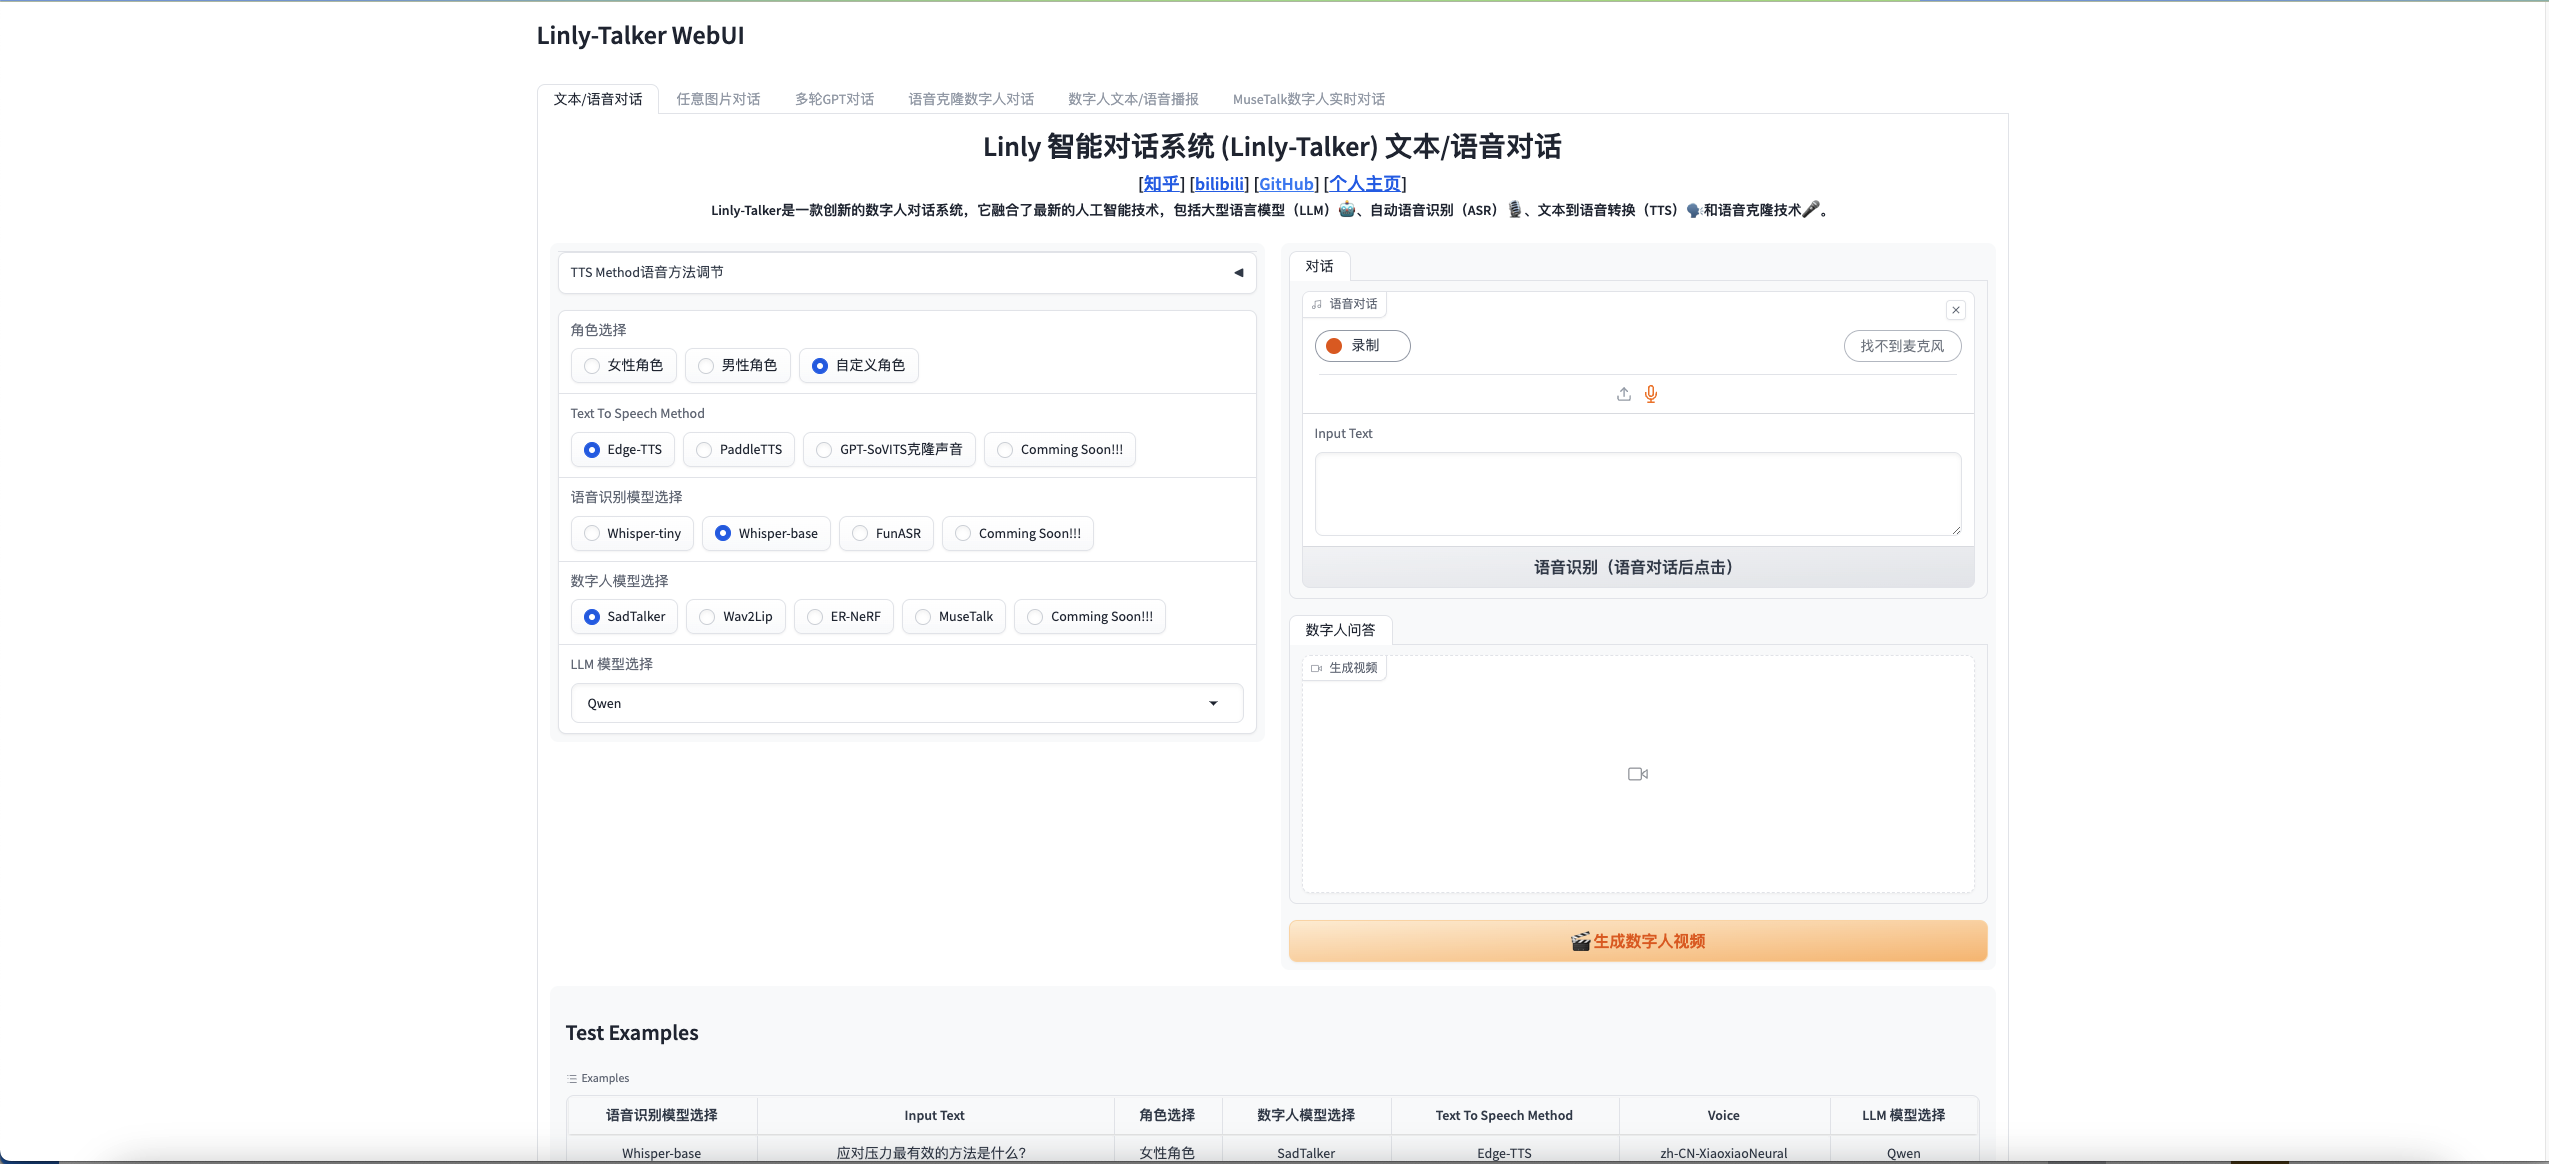